## Importing The Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


## Importing The Data

In [8]:
data = pd.read_csv(r'F:\ML_Projects\Myntra-Discount-Prediction-Model-main\Myntra Fasion Clothing.csv')

In [9]:
data.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [10]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

## Exploring The Data

In [11]:
print(data['URL'][0])

https://www.myntra.com/jeans/roadster/roadster-men-navy-blue-slim-fit-mid-rise-clean-look-jeans/2296012/buy


In [12]:
data['Description'][0]

'roadster men navy blue slim fit mid rise clean look jeans'

In [13]:
(data.groupby('Product_id')['URL'].count()>1).value_counts()

False    526564
Name: URL, dtype: int64

In [14]:
len(data.drop_duplicates(subset=['Product_id']))
data.shape

(526564, 13)

In [15]:
data['category_by_Gender'].nunique()

2

In [16]:
data['Category'].nunique()

8

In [19]:
data['Individual_category'].nunique()

92

In [20]:
data['BrandName'].nunique()

2088

In [21]:
data['Product_id'].nunique()

526564

## Data Cleaning 

In [22]:
print(data.isnull().sum())
print(data.isnull().mean())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64
URL                      0.000000
Product_id               0.000000
BrandName                0.000000
Category                 0.000000
Individual_category      0.000000
category_by_Gender       0.000000
Description              0.000000
DiscountPrice (in Rs)    0.366827
OriginalPrice (in Rs)    0.000000
DiscountOffer            0.141115
SizeOption               0.000000
Ratings                  0.638388
Reviews                  0.638388
dtype: float64


In [23]:
data[data['DiscountPrice (in Rs)'].isnull()][:3]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0


### Separating The Null Value Data And Normal Data

In [24]:
data_DP_null = data[data['DiscountPrice (in Rs)'].isnull()]
data_DP = data[data['DiscountPrice (in Rs)'].notnull()]
print(data.shape,data_DP.shape,data_DP_null.shape)

(526564, 13) (333406, 13) (193158, 13)


In [25]:
data_DP_null.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [26]:
data_DP_null.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74122
SizeOption                    0
Ratings                  120311
Reviews                  120311
dtype: int64

### Data Cleaning and Preprocessing for Discount Price

In [27]:
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str)
print(data_DP_null['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object


In [28]:
data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x:len(x))
data_DP_null['DiscountOffer_len'].value_counts()

7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: DiscountOffer_len, dtype: int64

In [29]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==1].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==6].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==7].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==9].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==10].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==11].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==12].iloc[0]['DiscountOffer'])

0
5% OFF
35% OFF
 45 % OFF
Rs. 38 OFF
Rs. 500 OFF
Rs. 1100 OFF


In [30]:
data1 = data_DP_null[data_DP_null['DiscountOffer_len']==1]
data6 = data_DP_null[data_DP_null['DiscountOffer_len']==6]
data7 = data_DP_null[data_DP_null['DiscountOffer_len']==7]
data9 = data_DP_null[data_DP_null['DiscountOffer_len']==9]
data10 = data_DP_null[data_DP_null['DiscountOffer_len']==10]
data11 = data_DP_null[data_DP_null['DiscountOffer_len']==11]
data12 = data_DP_null[data_DP_null['DiscountOffer_len']==12]

In [31]:
data1['Discount_Seg'] = data1['DiscountOffer'].apply(lambda x:x.split('%')[0])
data6['Discount_Seg'] = data6['DiscountOffer'].apply(lambda x:x.split('%')[0])
data7['Discount_Seg'] = data7['DiscountOffer'].apply(lambda x:x.split('%')[0])
data9['Discount_Seg'] = data9['DiscountOffer'].apply(lambda x:x.split('%')[0])
data10['Discount_Seg'] = data10['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data11['Discount_Seg'] = data11['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data12['Discount_Seg'] = data12['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])

In [32]:
data1['Discount_Seg'] = data1['Discount_Seg'].astype(float)
data6['Discount_Seg'] = data6['Discount_Seg'].astype(float)
data7['Discount_Seg'] = data7['Discount_Seg'].astype(float)
data9['Discount_Seg'] = data9['Discount_Seg'].astype(float)
data10['Discount_Seg'] = data10['Discount_Seg'].astype(float)
data11['Discount_Seg'] = data11['Discount_Seg'].astype(float)
data12['Discount_Seg'] = data12['Discount_Seg'].astype(float)

In [33]:
data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['Discount_Seg']
data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['Discount_Seg']/100)
data7['discount_seg_price'] = data7['OriginalPrice (in Rs)']-(data7['OriginalPrice (in Rs)']*data7['Discount_Seg']/100)
data9['discount_seg_price'] = data9['OriginalPrice (in Rs)']-(data9['OriginalPrice (in Rs)']*data9['Discount_Seg']/100)
data10['discount_seg_price'] = data10['OriginalPrice (in Rs)']-data10['Discount_Seg']
data11['discount_seg_price'] = data11['OriginalPrice (in Rs)']-data11['Discount_Seg']
data12['discount_seg_price'] = data12['OriginalPrice (in Rs)']-data12['Discount_Seg']

In [34]:
print('Before',data_DP_null.shape)
data_DP_null =pd.concat([data1,data6,data7,data9,data10,data11,data12],axis=0)
print('After',data_DP_null.shape)

Before (193158, 14)
After (193158, 16)


In [35]:
print(data_DP_null.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
DiscountOffer_len             0
Discount_Seg                  0
discount_seg_price            0
dtype: int64


In [36]:
data_DP_null[['DiscountPrice (in Rs)','OriginalPrice (in Rs)','DiscountOffer','discount_seg_price']]

,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,discount_seg_price
8,NaN,1098.0,0,1098.0
9,NaN,2749.0,0,2749.0
11,NaN,699.0,0,699.0
17,NaN,3999.0,0,3999.0
20,NaN,1298.0,0,1298.0
...,...,...,...,...
503949,NaN,7199.0,Rs. 4000 OFF,3199.0
503950,NaN,7199.0,Rs. 4900 OFF,2299.0
504004,NaN,7399.0,Rs. 5100 OFF,2299.0
504178,NaN,7599.0,Rs. 4200 OFF,3399.0


In [37]:
data_DP_null['Price_diff'] = data_DP_null['OriginalPrice (in Rs)'] - data_DP_null['discount_seg_price']
data_DP_null['discount_seg_%']= round(data_DP_null['Price_diff']*100/data_DP_null['OriginalPrice (in Rs)'])

In [38]:
data_DP_null.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'DiscountOffer_len', 'Discount_Seg', 'discount_seg_price',
       'Price_diff', 'discount_seg_%'],
      dtype='object')

In [39]:
del data_DP_null['Price_diff']
del data_DP_null['DiscountOffer_len']
del data_DP_null['discount_seg_price']
del data_DP_null['Discount_Seg']

In [40]:
data_DP_null

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,0.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,0.0
11,https://www.myntra.com/tshirts/roadster/roadst...,10307375,Roadster,Topwear,tshirts,Men,roadster men navy blue white striped polo col...,NaN,699.0,0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.1,996.0,0.0
17,https://www.myntra.com/kurta-sets/sangria/sang...,10561392,Sangria,Plus Size,kurta-sets,Women,sangria women green off white printed kurta w...,NaN,3999.0,0,"XS, S, M, L, XL, XXL, 3XL",4.3,995.0,0.0
20,https://www.myntra.com/tshirts/roadster/roadst...,17385142,Roadster,Western,tshirts,Women,roadster women pack of 2 printed cotton t shirt,NaN,1298.0,0,"XS, S, M, L, XL",4.4,994.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503949,https://www.myntra.com/dresses/fashor/fashor-b...,16989672,FASHOR,Western,dresses,Women,fashor black beige ethnic motifs embroidered ...,NaN,7199.0,Rs. 4000 OFF,"S, M, L, XL, XXL",NaN,NaN,56.0
503950,https://www.myntra.com/dresses/fashor/fashor-w...,17783562,FASHOR,Western,dresses,Women,fashor women green floral printed dress with d...,NaN,7199.0,Rs. 4900 OFF,"S, M, L, XL, XXL",NaN,NaN,68.0
504004,https://www.myntra.com/dresses/fashor/fashor-m...,16897510,FASHOR,Western,dresses,Women,fashor mustard red ethnic motifs ethnic maxi ...,NaN,7399.0,Rs. 5100 OFF,"M, L, XL, XXL, 3XL",NaN,NaN,69.0
504178,https://www.myntra.com/dresses/fashor/fashor-o...,17213218,FASHOR,Western,dresses,Women,fashor off white black a line midi dress,NaN,7599.0,Rs. 4200 OFF,"S, M, L, XL, XXL",NaN,NaN,55.0


In [41]:
data_DP['discount_seg_%'] = round(data_DP['DiscountPrice (in Rs)']*100/data_DP['OriginalPrice (in Rs)'])
data_DP

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,55.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,45.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,45.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,69.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443936,https://www.myntra.com/tops/dechen/dechen-red-...,17353876,DECHEN,Western,tops,Women,dechen red white print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443937,https://www.myntra.com/tops/dechen/dechen-whit...,17353938,DECHEN,Western,tops,Women,dechen white black polka dots print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443938,https://www.myntra.com/tops/dechen/dechen-blac...,17353860,DECHEN,Western,tops,Women,dechen black white polka dots printed top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443939,https://www.myntra.com/tops/dechen/dechen-navy...,17353926,DECHEN,Western,tops,Women,dechen navy blue floral printed top with gathe...,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0


In [42]:
data_DP['price_diff'] = data_DP['OriginalPrice (in Rs)']-data_DP['DiscountPrice (in Rs)']
data_DP['discount_seg_%'] = round(data_DP['price_diff']*100/data_DP['OriginalPrice (in Rs)'])

In [43]:
data_DP.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
discount_seg_%           float64
price_diff               float64
dtype: object

In [44]:
del data_DP['price_diff']

### Concatenating Cleaned Data and Normal Data

In [45]:
print('After',data.shape)
data_new = pd.concat([data_DP,data_DP_null],axis=0)
print('Before',data_new.shape)

After (526564, 13)
Before (526564, 14)


In [46]:
data_new.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'discount_seg_%'],
      dtype='object')

In [47]:
data_new.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,55.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,31.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,60.0


In [48]:
print(data_new.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                  336152
Reviews                  336152
discount_seg_%                0
dtype: int64


### Handling Missing Values in the 'Ratings' and 'Reviews' Columns

In [49]:
data_new['Ratings'] = data_new['Ratings'].fillna(0)
data_new['Reviews'] = data_new['Reviews'].fillna(0)

In [50]:
print(data_new.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                       0
Reviews                       0
discount_seg_%                0
dtype: int64


### One-Hot Encoding of Gender Category in Data_new

In [51]:
data_new['gender'] = pd.get_dummies(data_new['category_by_Gender'],drop_first = True).values

In [52]:
data_new[['gender','category_by_Gender']]

,gender,category_by_Gender
0,0,Men
1,0,Men
2,0,Men
3,1,Women
6,0,Men
...,...,...
503949,1,Women
503950,1,Women
504004,1,Women
504178,1,Women


## Feature Engineering and Data Modelling

### Splitting Data into Data With Discount Value and Data With Nan and Zero Discount Value

In [53]:
model_data = data_new[data_new['discount_seg_%']!=0]
Non_Discount_data = data_new[data_new['discount_seg_%']==0]
print(model_data.shape)
print(Non_Discount_data.shape)

(452433, 15)
(74131, 15)


### Data Splitting into Training, Validation, and Testing Data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = model_data.drop(['discount_seg_%'],axis=1)
y = model_data['discount_seg_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=model_data['discount_seg_%'])
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.33,random_state=42)

### Feature Creation On Training Data

In [56]:
check = X_train.groupby('BrandName')['Ratings'].mean().reset_index(name='rating')
print('Brand Have Ratings',check[check['rating']!=0].shape[0])
print('Brand do not Have Ratings',check[check['rating']==0].shape[0])

Brand Have Ratings 1318
Brand do not Have Ratings 432


In [57]:
check = X_train.groupby('BrandName')['Reviews'].mean().reset_index(name='review')
print('Brand Have Review',check[check['review']!=0].shape[0])
print('Brand do not Have Review',check[check['review']==0].shape[0])

Brand Have Review 1317
Brand do not Have Review 433


In [58]:
brand_impt = X_train.groupby('BrandName').agg({'Ratings':'mean','Reviews':'sum'}).reset_index()
brand_impt[:2]

,BrandName,Ratings,Reviews
0,1 Stop Fashion,0.037069,3.0
1,109F,1.710526,49.0


In [59]:
brand_impt['Brand_importance'] = brand_impt['Ratings']*brand_impt['Reviews']
brand_impt

,BrandName,Ratings,Reviews,Brand_importance
0,1 Stop Fashion,0.037069,3.0,0.111207
1,109F,1.710526,49.0,83.815789
2,20Dresses,1.010543,3522.0,3559.132907
3,39 THREADS,0.000000,0.0,0.000000
4,3PIN,0.210769,12.0,2.529231
...,...,...,...,...
1745,urSense,1.892857,56.0,106.000000
1746,urban undress,0.000000,0.0,0.000000
1747,wHAT'S DOwn,0.000000,0.0,0.000000
1748,wild U,0.505882,10.0,5.058824


In [60]:
print(X_train.shape)
X_train = X_train.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(Non_Discount_data.shape)

(203097, 14)
(203097, 15)
(149303, 14)
(149303, 15)
(100033, 14)
(100033, 15)
(74131, 15)
(74131, 16)


In [61]:
individual_category_popularity = X_train.groupby('Individual_category')['BrandName'].nunique().reset_index(name='ind_cat_popularity')

In [62]:
print(X_train.shape)
X_train = X_train.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(Non_Discount_data.shape)

(203097, 15)
(203097, 16)
(149303, 15)
(149303, 16)
(100033, 15)
(100033, 16)
(74131, 16)
(74131, 17)


In [63]:
category_popularity = X_train.groupby('Category')['Product_id'].count().reset_index(name='cat_popularity')

In [64]:
print(X_train.shape)
X_train = X_train.merge(category_popularity, on = 'Category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(category_popularity, on = 'Category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(category_popularity, on = 'Category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(category_popularity, on = 'Category', how = 'left')
print(Non_Discount_data.shape)

(203097, 16)
(203097, 17)
(149303, 16)
(149303, 17)
(100033, 16)
(100033, 17)
(74131, 17)
(74131, 18)


## Exploratory Data Analysis on the Model Data

<AxesSubplot:>

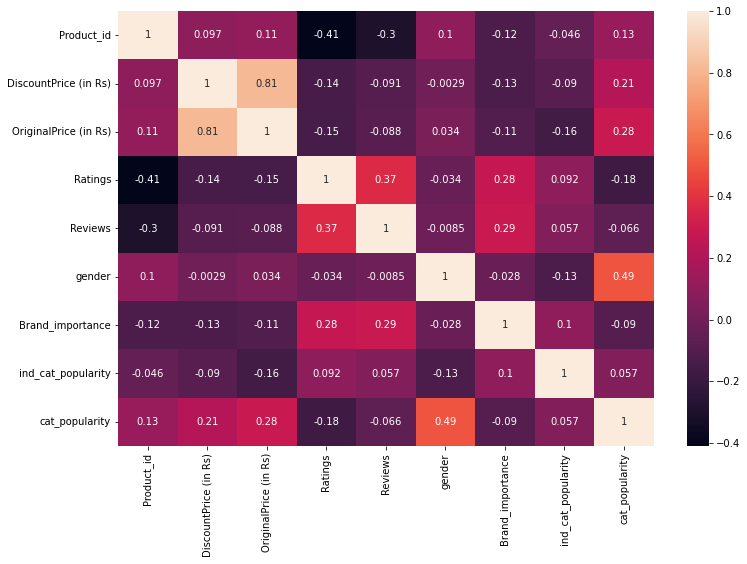

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_train.corr(),annot=True)

<AxesSubplot:>

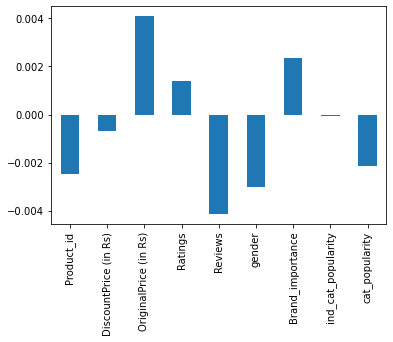

In [66]:
X_train.corrwith(y_train).plot(kind='bar')

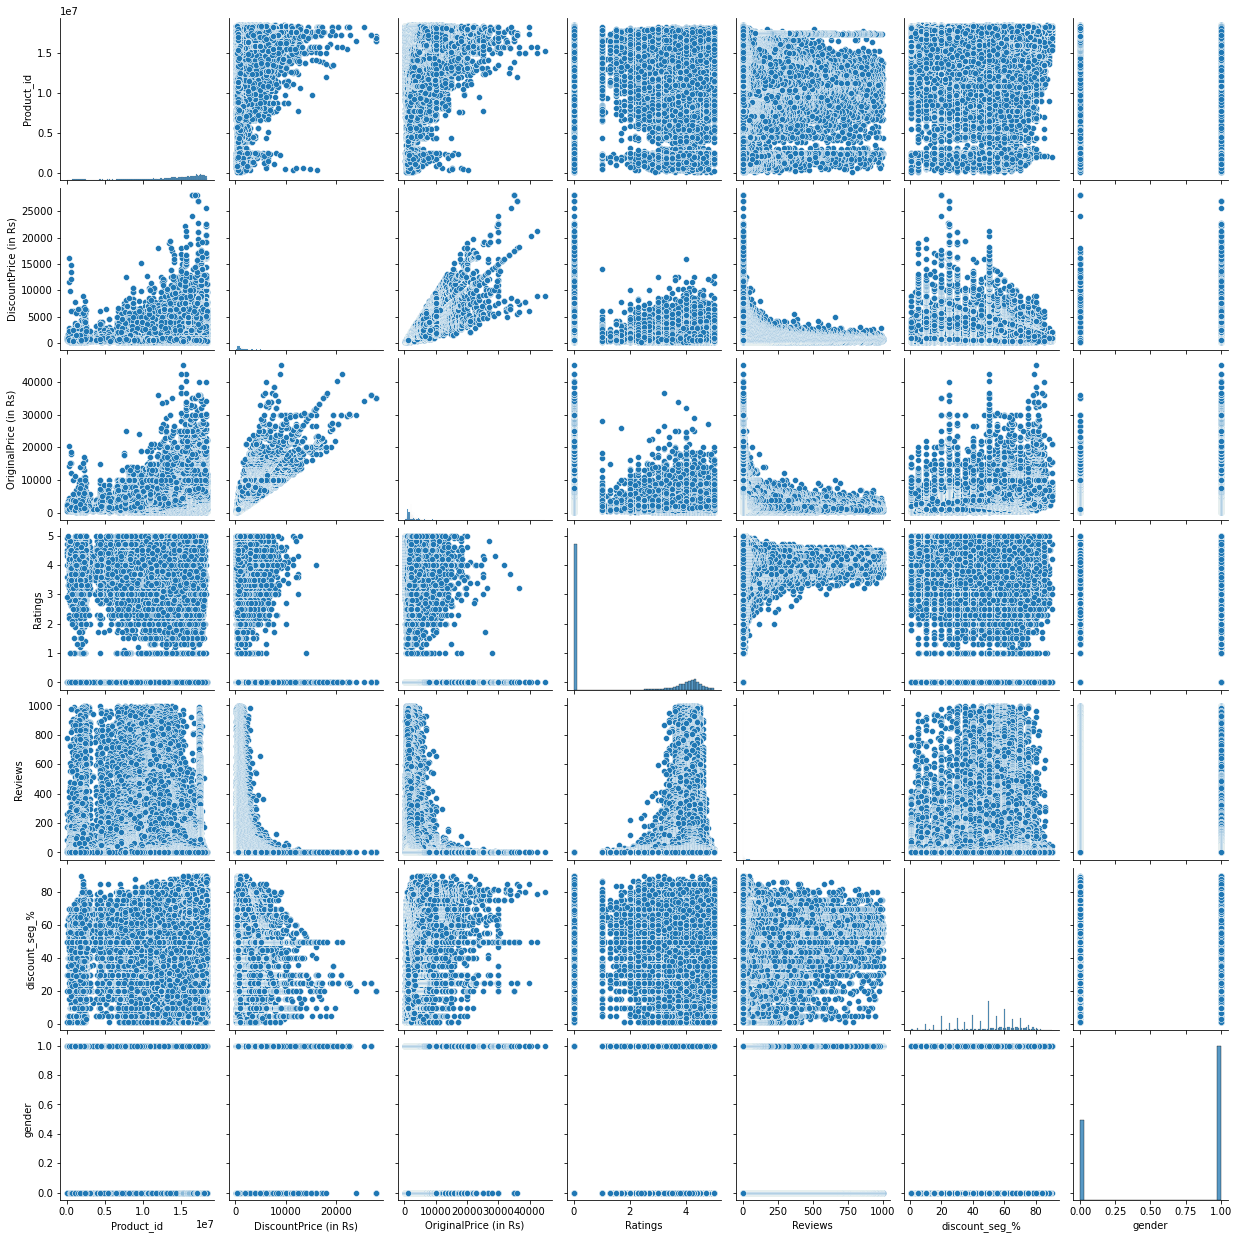

In [67]:
sns.pairplot(model_data)

In [74]:
X_train.columns

Index(['OriginalPrice (in Rs)', 'Brand_importance', 'ind_cat_popularity',
       'cat_popularity', 'gender'],
      dtype='object')

### Selecting Model Features and Handling Missing Values

In [75]:
model_feature = ['OriginalPrice (in Rs)','Brand_importance','ind_cat_popularity','cat_popularity','gender']
X_train = X_train[model_feature]
X_test = X_test[model_feature]
X_val = X_val[model_feature]
Non_Discount_data = Non_Discount_data[model_feature]

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_val = X_val.fillna(0)
Non_Discount_data = Non_Discount_data.fillna(0)

## Model Development

### Building and Evaluating a Linear Regression Model

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [77]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.10612979165919334
Model_Validation_Accuracy: 0.10091038142063313


### Building and Evaluating a KNN Model

In [78]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [79]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.713710544393692
Model_Validation_Accuracy: 0.7060086537611636


### Building and Evaluating the Random Forest Regressor Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [81]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8143498233826454
Model_Validation_Accuracy: 0.8120616251073921


The test accuracy of the model is 0.8146918547174452 and the validation accuracy of the model is 0.8122744058168194, which is quite good.Hence, we can say that this model is a good fit for the prediction of discount segment percentages.

### Comparing Actual and Predicted Target Values for the Testing Data

In [82]:
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check

,actual,prediction
485785,27.0,33.996071
377488,60.0,41.176857
405081,25.0,31.551293
69755,60.0,56.722635
386739,50.0,74.392841
...,...,...
199982,35.0,32.264183
349241,70.0,70.345419
150383,70.0,62.417500
397742,65.0,64.757796


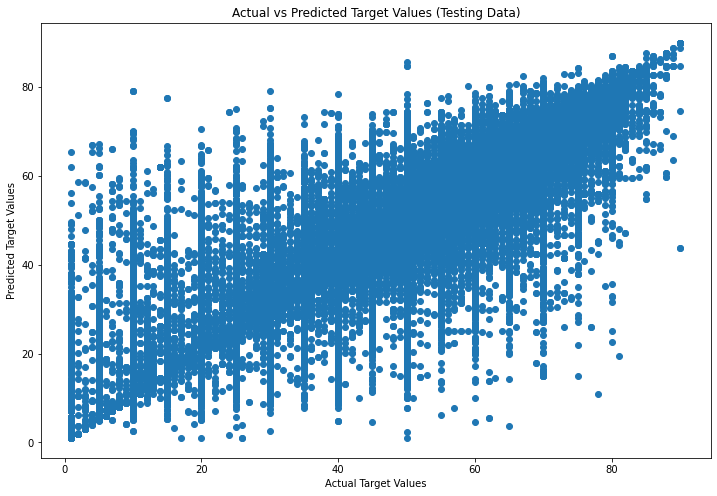

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(test_check['actual'], test_check['prediction'])
ax.set_xlabel('Actual Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Actual vs Predicted Target Values (Testing Data)')
plt.show()

### Comparing Actual and Predicted Target Values for the Validation Data

In [84]:
Val_check = pd.DataFrame()
Val_check['actual'] = y_val
Val_check['prediction'] = y_val_predict
Val_check

,actual,prediction
167632,60.0,49.590253
65912,70.0,63.277134
418337,56.0,56.000000
9271,45.0,53.867511
259034,62.0,57.419160
...,...,...
416051,50.0,50.000000
218271,62.0,41.622938
43281,40.0,44.004345
489168,65.0,65.000000


We can see that the prediction values and actual values are fairly close to each other. However, there are some discrepancies in the predictions. 

### Feature Importance for Predicting the Target Variable

In [85]:
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_test.columns
feature_importance['Feature_importance'] = model.feature_importances_
feature_importance = feature_importance.sort_values(by='Feature_importance',ascending=False)
feature_importance

,Feature,Feature_importance
1,Brand_importance,0.539722
0,OriginalPrice (in Rs),0.269521
2,ind_cat_popularity,0.087176
3,cat_popularity,0.086320
4,gender,0.017261


<AxesSubplot:xlabel='Feature'>

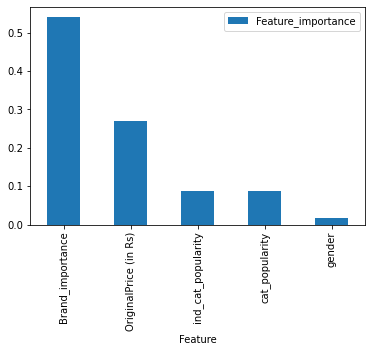

In [86]:
feature_importance.set_index('Feature').plot(kind='bar')

## Prediction on Unknown Data

In [87]:
Non_Discount_data = Non_Discount_data[X_train.columns]
Non_Discount_data['Discount_prediction'] = model.predict(Non_Discount_data)
Non_Discount_data

,OriginalPrice (in Rs),Brand_importance,ind_cat_popularity,cat_popularity,gender,Discount_prediction
0,600.0,414.955556,133.0,20426,1,22.258538
1,2499.0,410.537313,431.0,61037,1,51.538571
2,2499.0,410.537313,431.0,61037,1,51.538571
3,2499.0,410.537313,431.0,61037,1,51.538571
4,2499.0,410.537313,431.0,61037,1,51.538571
...,...,...,...,...,...,...
74126,9999.0,1545.032432,173.0,53519,1,48.097619
74127,9999.0,1545.032432,363.0,53519,1,50.499286
74128,9999.0,0.000000,586.0,53519,1,39.870000
74129,9999.0,0.000000,586.0,53519,1,39.870000


## Kernel Density Estimate of Four Features in the Training Data

<AxesSubplot:xlabel='OriginalPrice (in Rs)', ylabel='Density'>

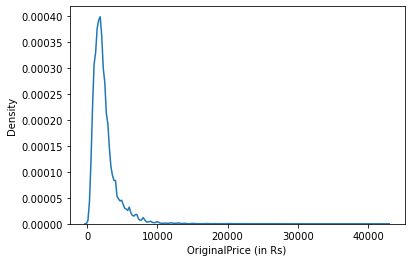

In [88]:
sns.kdeplot(data=X_train,x='OriginalPrice (in Rs)')

<AxesSubplot:xlabel='Brand_importance', ylabel='Density'>

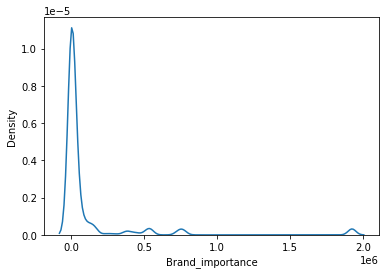

In [89]:
sns.kdeplot(data=X_train,x='Brand_importance')

<AxesSubplot:xlabel='cat_popularity', ylabel='Density'>

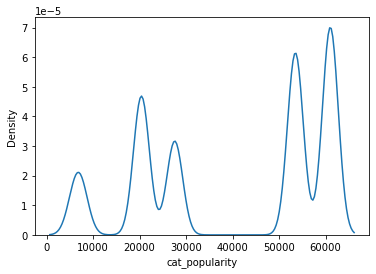

In [90]:
sns.kdeplot(data=X_train,x='cat_popularity')

<AxesSubplot:xlabel='ind_cat_popularity', ylabel='Density'>

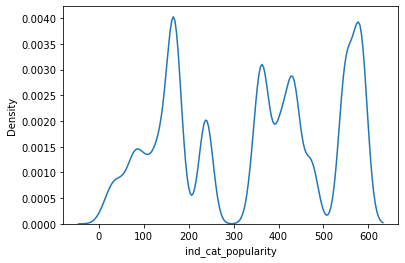

In [91]:
sns.kdeplot(data=X_train,x='ind_cat_popularity')

#### Note:

We observe that there is a high imbalance in the magnitude of data for each feature. The data for each feature varies significantly over the range. To improve the performance of the model, we can consider scaling the data using log transformation. This transformation can help reduce the impact of outliers and bring the data to a more comparable magnitude, thus improving the performance of the model.

In [92]:
X_train.columns

Index(['OriginalPrice (in Rs)', 'Brand_importance', 'ind_cat_popularity',
       'cat_popularity', 'gender'],
      dtype='object')

## Logarithmic Transformation of Features for Improved Modeling

In [93]:
eps = 0.001

X_train['Brand_importance']=np.log(X_train.pop('Brand_importance')+eps)
X_train['OriginalPrice (in Rs)']=np.log(X_train.pop('OriginalPrice (in Rs)')+eps)
X_train['ind_cat_popularity']=np.log(X_train.pop('ind_cat_popularity')+eps)
X_train['cat_popularity']=np.log(X_train.pop('cat_popularity')+eps)

X_test['Brand_importance']=np.log(X_test.pop('Brand_importance')+eps)
X_test['OriginalPrice (in Rs)']=np.log(X_test.pop('OriginalPrice (in Rs)')+eps)
X_test['ind_cat_popularity']=np.log(X_test.pop('ind_cat_popularity')+eps)
X_test['cat_popularity']=np.log(X_test.pop('cat_popularity')+eps)

X_val['Brand_importance']=np.log(X_val.pop('Brand_importance')+eps)
X_val['OriginalPrice (in Rs)']=np.log(X_val.pop('OriginalPrice (in Rs)')+eps)
X_val['ind_cat_popularity']=np.log(X_val.pop('ind_cat_popularity')+eps)
X_val['cat_popularity']=np.log(X_val.pop('cat_popularity')+eps)

The logarithmic transformation is applied to the features of the training, testing and validation data. The purpose of this transformation is to make the data more normally distributed and easier to model. The logarithm is applied to the values in the feature column and the result is stored in the same column. A small value eps (0.001) is added to the values before taking the logarithm to avoid taking the logarithm of zero.

<AxesSubplot:xlabel='OriginalPrice (in Rs)', ylabel='Density'>

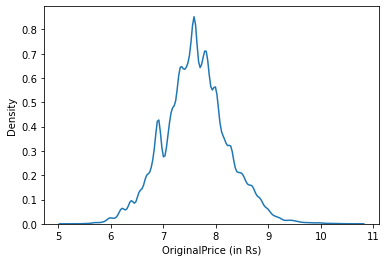

In [94]:
sns.kdeplot(data=X_train,x='OriginalPrice (in Rs)')

<AxesSubplot:xlabel='Brand_importance', ylabel='Density'>

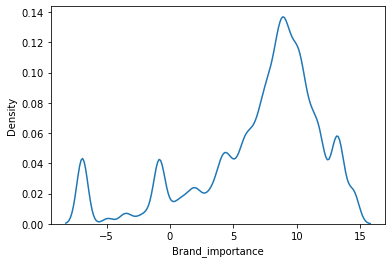

In [95]:
sns.kdeplot(data=X_train,x='Brand_importance')

<AxesSubplot:xlabel='cat_popularity', ylabel='Density'>

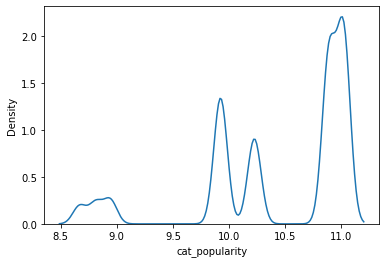

In [96]:
sns.kdeplot(data=X_train,x='cat_popularity')

<AxesSubplot:xlabel='ind_cat_popularity', ylabel='Density'>

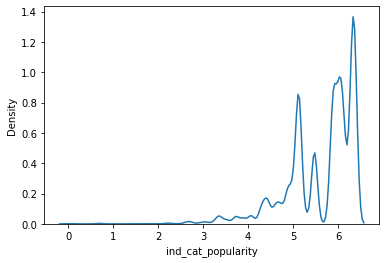

In [97]:
sns.kdeplot(data=X_train,x='ind_cat_popularity')

After scaling the data, we noticed that the magnitude of each feature is more balanced and the distribution is closer to a normal distribution. This is important because some machine learning models are sensitive to the scale of the input features. By log transforming the data, we improved the alignment with a normal distribution, which can improve the performance of our model.

In [98]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [99]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.1643456646107988
Model_Validation_Accuracy: 0.16204022619480218


The accuracy of the model has improved after taking the log of the data. Before the transformation, the test accuracy was 0.106 and validation accuracy was 0.100. After the transformation, the test accuracy increased to 0.164 and validation accuracy increased to 0.162.

In [100]:
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [101]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.7345843748085108
Model_Validation_Accuracy: 0.7330827012501482


As we can see, the accuracy of the model has improved after transforming the features. The test accuracy improved from 0.714 to 0.735 and the validation accuracy improved from 0.705 to 0.733.

In [102]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [103]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.814230037794039
Model_Validation_Accuracy: 0.8119877332691485


The model accuracy before taking log of the features was around 81.46% for the test data and 81.22% for the validation data. After taking log of the features, the model accuracy was around 81.44% for the test data and 81.24% for the validation data. As we can see, the difference in accuracy is very minimal, indicating that taking log of the features did not have a significant impact on the model's accuracy.

### Prediction of Discount Percentage for Non-Discounted Products using Log-Transformed Data and Random Forest Regressor

In [104]:
Non_Discount_data = Non_Discount_data[X_train.columns]
Non_Discount_data['Discount_prediction'] = model.predict(Non_Discount_data)
Non_Discount_data

,gender,Brand_importance,OriginalPrice (in Rs),ind_cat_popularity,cat_popularity,Discount_prediction
0,1,414.955556,600.0,133.0,20426,68.716833
1,1,410.537313,2499.0,431.0,61037,68.716833
2,1,410.537313,2499.0,431.0,61037,68.716833
3,1,410.537313,2499.0,431.0,61037,68.716833
4,1,410.537313,2499.0,431.0,61037,68.716833
...,...,...,...,...,...,...
74126,1,1545.032432,9999.0,173.0,53519,68.716833
74127,1,1545.032432,9999.0,363.0,53519,68.716833
74128,1,0.000000,9999.0,586.0,53519,58.725740
74129,1,0.000000,9999.0,586.0,53519,58.725740
